In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import *
import scikitplot as skplt

In [2]:
data=pd.read_csv("default.csv")

In [3]:
data.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [5]:
data.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [6]:
data.shape

(1000, 21)

In [7]:
#checking number of duplicates, missing values and single valued columns
print("Duplicates:", data.duplicated().sum())
print("Missing values:", data.isna().sum().sum())
print("Single valued columns:", data.columns[data.nunique()==1])

Duplicates: 0
Missing values: 0
Single valued columns: Index([], dtype='object')


In [8]:
data.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [9]:
data.default.value_counts(normalize=True)*100

0    70.0
1    30.0
Name: default, dtype: float64

In [10]:
data.savings.isna().sum()

0

In [11]:
data[data['purpose']=='business']['default'].value_counts(normalize=True)*100

0    64.948454
1    35.051546
Name: default, dtype: float64

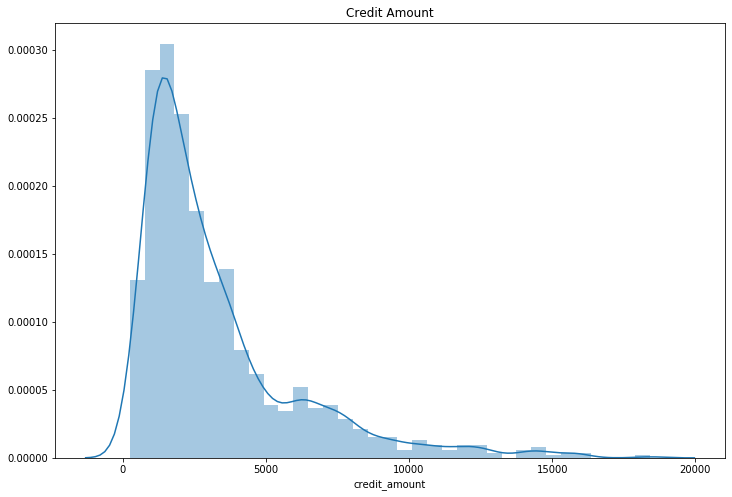

In [12]:
plt.figure(figsize=(12,8))
sns.distplot(data.credit_amount)
plt.title("Credit Amount")
plt.savefig("Credit_Amount.jpg")
plt.show()

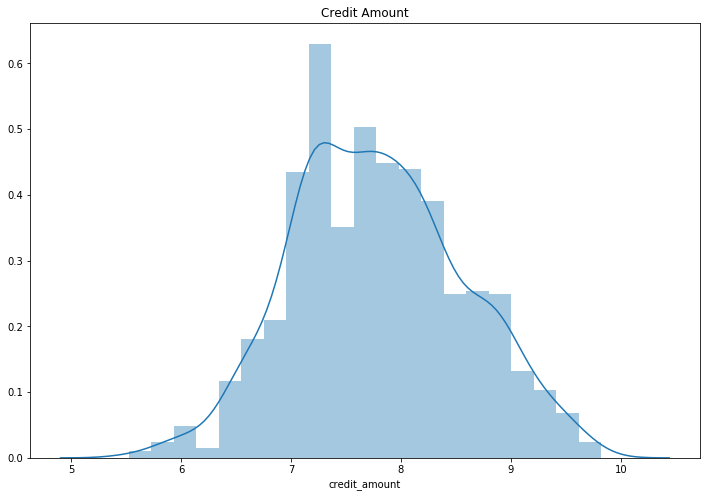

In [13]:
plt.figure(figsize=(12,8))
sns.distplot(np.log(data.credit_amount))
plt.title("Credit Amount")
plt.show()

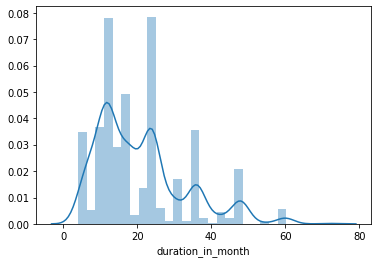

In [14]:
sns.distplot(data.duration_in_month)
plt.show()

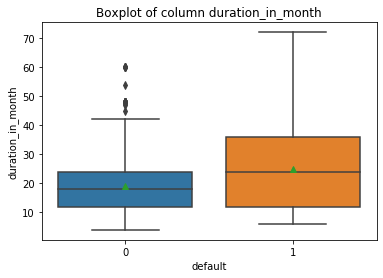

In [15]:
sns.boxplot(y=data["duration_in_month"], x=data["default"], showmeans=True, data=data, fliersize=5)
plt.title("Boxplot of column duration_in_month")
plt.show()

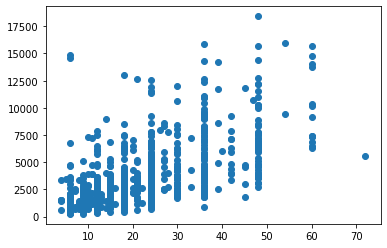

In [16]:
plt.scatter(data["duration_in_month"],data["credit_amount"])
plt.show()

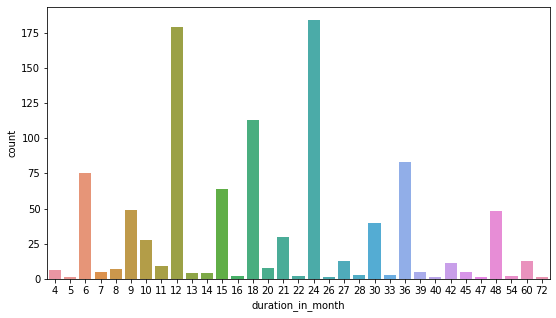

In [17]:
plt.figure(figsize=(9,5))
sns.countplot(data.duration_in_month)
plt.show()

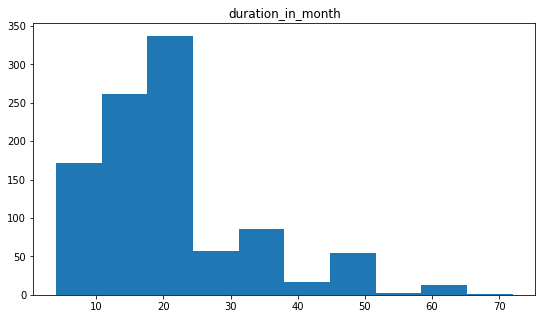

In [18]:
plt.figure(figsize=(9,5))
plt.hist(data.duration_in_month)
plt.title("duration_in_month")
plt.show()

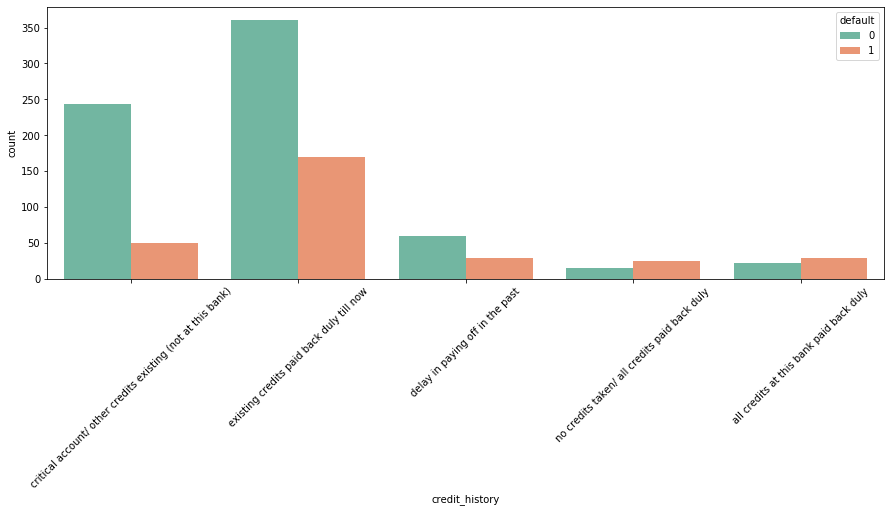

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(x="credit_history", hue="default", data=data, palette="Set2")
plt.xticks(fontsize = 10,rotation=45)
plt.savefig("Credit_History.jpg")
plt.show()

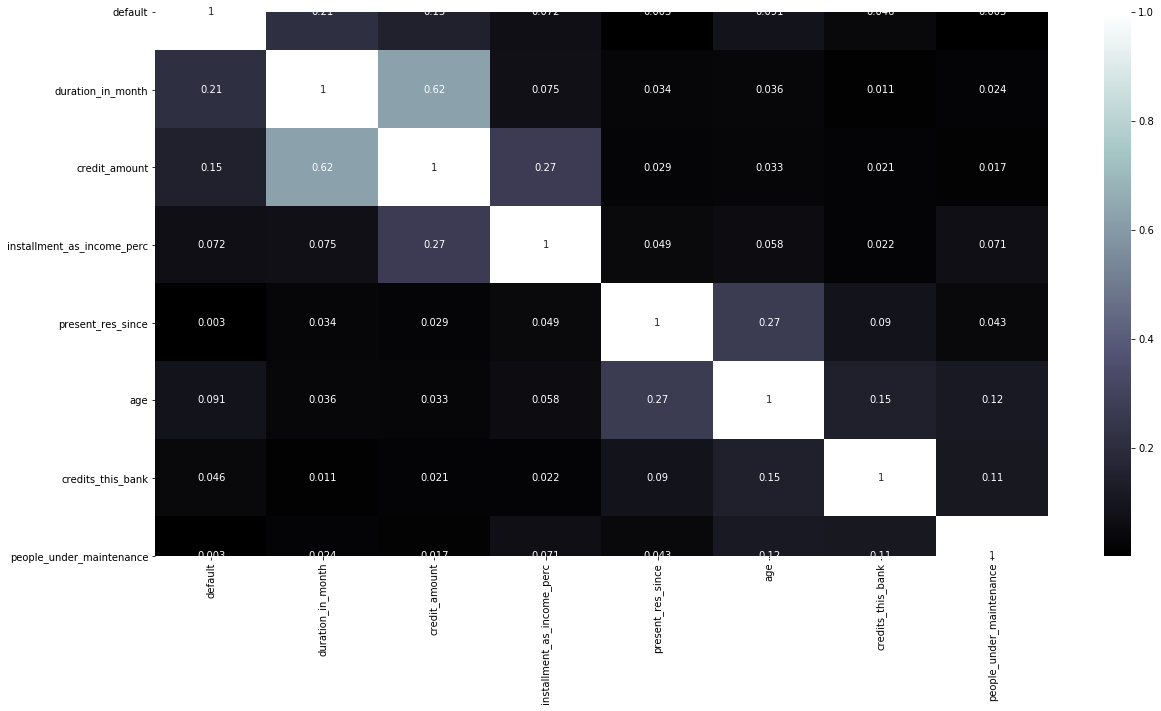

In [20]:
#Let's visualize correlations
plt.figure(figsize=(20,10))
sns.heatmap(data.corr().abs(),annot=True, cmap = "bone")
plt.show()

In [21]:
data_num=data.select_dtypes(exclude="object")
data_obj=data.select_dtypes(include="object")

In [22]:
data_dummies=pd.get_dummies(data_obj, prefix=data_obj.columns,drop_first=True)
data=data_num.join(data_dummies)

In [23]:
Y=data.default
X=data.drop("default",axis=1)

In [24]:
X=pd.get_dummies(X, drop_first=True)

In [25]:
data.shape

(1000, 49)

In [26]:
X.head()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
0,6,1169,4,4,67,2,1,1,0,0,...,0,1,0,1,0,1,0,0,1,1
1,48,5951,2,2,22,1,1,0,0,0,...,0,1,0,1,0,1,0,0,0,1
2,12,2096,2,3,49,1,2,0,0,1,...,0,1,0,1,0,0,0,1,0,1
3,42,7882,2,4,45,1,2,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,24,4870,3,4,53,2,2,1,0,0,...,1,1,0,0,0,1,0,0,0,1


In [27]:
X0, X1, Y0, Y1=train_test_split(X,Y, test_size=0.25, random_state=42)

In [28]:
# scale the data 
scaler = StandardScaler()
scaler.fit(X0)
X0_scaled = pd.DataFrame(scaler.transform(X0), columns=X0.columns)
X1_scaled = pd.DataFrame(scaler.transform(X1), columns=X1.columns)

In [29]:
logit=LogisticRegression(random_state=42)
logit.fit(X0_scaled,Y0)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
Y0_logit=logit.predict_proba(X0_scaled)[:,1]
Y1_logit=logit.predict_proba(X1_scaled)[:,1]


In [31]:
#building GridSearch with Logistic Regression
logit_1=LogisticRegression(random_state=42)

param_logit = {'class_weight':[None, 'balanced'], 'C':np.linspace(1,10,20),
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

gs_logit=GridSearchCV(estimator=logit_1, param_grid=param_logit,
                      scoring="roc_auc", cv=5, verbose=1, n_jobs=-1).fit(X0_scaled,Y0)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   34.3s finished


In [32]:
#finding out the best parameters
best_params = gs_logit.best_params_
print(best_params)

{'C': 1.0, 'class_weight': None, 'solver': 'liblinear'}


In [68]:
print("ROC_AUC Train for tuned Logit:",roc_auc_score(Y0,Y0_logit))
print("ROC_AUC Test for tuned Logit:",roc_auc_score(Y1,Y1_logit))

ROC_AUC Train for tuned Logit: 0.7113077233313168
ROC_AUC Test for tuned Logit: 0.6812578027465669


In [33]:
#building logit with best params and seeing the results
logit_grid=LogisticRegression(random_state=42, C=best_params['C'],
                              solver=best_params['solver']).fit(X0,Y0)

Y0_logit_grid=logit_grid.predict_proba(X0)[:,1]
Y1_logit_grid=logit_grid.predict_proba(X1)[:,1]

In [34]:
print("ROC_AUC Train for tuned Logit:",roc_auc_score(Y0,Y0_logit))
print("ROC_AUC Test for tuned Logit:",roc_auc_score(Y1,Y1_logit))

ROC_AUC Train for tuned Logit: 0.8325351213282247
ROC_AUC Test for tuned Logit: 0.8104712858926342


In [35]:
#calculating using classification report
print("Logistic Regression Train:")
print(classification_report(Y0,logit_grid.predict(X0)))

print("Logistic Regression Test:")
print(classification_report(Y1,logit_grid.predict(X1)))

Logistic Regression Train:
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       522
           1       0.67      0.54      0.60       228

    accuracy                           0.78       750
   macro avg       0.74      0.71      0.72       750
weighted avg       0.77      0.78      0.77       750

Logistic Regression Test:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       178
           1       0.61      0.49      0.54        72

    accuracy                           0.76       250
   macro avg       0.71      0.68      0.69       250
weighted avg       0.75      0.76      0.76       250



In [36]:
Y0_logit = np.where(Y0_logit_grid>0.5,1,0)
Y1_logit = np.where(Y1_logit_grid>0.5,1,0)

print("ROC_AUC Train:",roc_auc_score(Y0,Y0_logit))
print("ROC_AUC Test:",roc_auc_score(Y1,Y1_logit))
print("Accuracy Train:",accuracy_score(Y0,Y0_logit))
print("Accuracy Test:",accuracy_score(Y1,Y1_logit))
print("Recall Train:",recall_score(Y0,Y0_logit))
print("Recall Test:",recall_score(Y1,Y1_logit))

ROC_AUC Train: 0.7113077233313168
ROC_AUC Test: 0.6812578027465669
Accuracy Train: 0.7786666666666666
Accuracy Test: 0.764
Recall Train: 0.5394736842105263
Recall Test: 0.4861111111111111


In [37]:
X_scaled = pd.DataFrame(scaler.transform(X), columns=X0.columns)


In [38]:
CV_scores = cross_val_score(estimator=logit_grid, X=X_scaled, y=Y, cv=5, scoring="roc_auc")
print(CV_scores)

[0.77869048 0.78642857 0.80464286 0.76202381 0.79833333]


In [39]:
print("Mean 5-fold ROC AUC score for Tuned Logit", np.mean(CV_scores))


Mean 5-fold ROC AUC score for Tuned Logit 0.7860238095238096


### DT

In [40]:
#building the model
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X0,Y0)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [41]:
#calculating probabilities
Y0_dt=dt.predict_proba(X0)[:,1]
Y1_dt=dt.predict_proba(X1)[:,1]

In [42]:
#calculating roc auc score
print("ROC_AUC Train for Fully grown DT:",roc_auc_score(Y0,Y0_dt))
print("ROC_AUC Test for Fully grown DT:",roc_auc_score(Y1,Y1_dt))

ROC_AUC Train for Fully grown DT: 1.0
ROC_AUC Test for Fully grown DT: 0.6460674157303371


In [64]:
#setting 2 hyperparameter values manually
dt1=DecisionTreeClassifier(random_state=42, max_depth=10,min_samples_leaf=90).fit(X0,Y0)

In [65]:
#calculating probabilities
Y0_dt1=dt1.predict_proba(X0)[:,1]
Y1_dt1=dt1.predict_proba(X1)[:,1]

In [66]:
#little bit lower ROC AUC scores however we achieved our goal of almost no overfitting
print("ROC_AUC Train for Manually Tuned DT:",roc_auc_score(Y0,Y0_dt1))
print("ROC_AUC Test for Manually Tuned DT:",roc_auc_score(Y1,Y1_dt1))

ROC_AUC Train for Manually Tuned DT: 0.741173455669826
ROC_AUC Test for Manually Tuned DT: 0.7369694132334582


In [67]:
#setting up the ranges for hyperparameters
param_dt={"max_depth":range(1,9),"min_samples_leaf":range(10,100,10),
          "class_weight":["balanced", None]}

In [60]:
#Cross-Validated Gridsearch
gs_dt=GridSearchCV(estimator=dt,param_grid=param_dt,scoring="roc_auc",cv=5,n_jobs=-1)
gs_dt.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': range(1, 9),
                         'mi

In [61]:
#let's see the optimal parameters
best_params = gs_dt.best_params_
best_params

{'class_weight': 'balanced', 'max_depth': 4, 'min_samples_leaf': 40}

In [62]:
#fitting the model with best parameters
dt_grid=DecisionTreeClassifier(class_weight=best_params['class_weight'],max_depth=best_params['max_depth'],
                             min_samples_leaf=best_params['min_samples_leaf'], random_state=42).fit(X0,Y0)

#getting probabilities
Y0_dt_grid=dt_grid.predict_proba(X0)[:,1]
Y1_dt_grid=dt_grid.predict_proba(X1)[:,1]

In [63]:
Y0_dt_grid = np.where(Y0_dt_grid>0.5,1,0)
Y1_dt_grid = np.where(Y1_dt_grid>0.5,1,0)

print("ROC_AUC Train:",roc_auc_score(Y0,Y0_dt_grid))
print("ROC_AUC Test:",roc_auc_score(Y1,Y1_dt_grid))
print("Accuracy Train:",accuracy_score(Y0,Y0_dt_grid))
print("Accuracy Test:",accuracy_score(Y1,Y1_dt_grid))
print("Recall Train:",recall_score(Y0,Y0_dt_grid))
print("Recall Test:",recall_score(Y1,Y1_dt_grid))

ROC_AUC Train: 0.6945452712240371
ROC_AUC Test: 0.6825062421972534
Accuracy Train: 0.6573333333333333
Accuracy Test: 0.648
Recall Train: 0.7894736842105263
Recall Test: 0.7638888888888888


In [51]:
#Mean cross val score for model with default hyperparameters
print("Mean 5-fold ROC AUC score for DT Tuned hyperparameters:",np.mean(cross_val_score(estimator=dt_grid, X=X,y=Y,cv=5, scoring="roc_auc")))

Mean 5-fold ROC AUC score for DT Tuned hyperparameters: 0.7295357142857143


In [52]:
#property returning feature importances as array
dt_grid.feature_importances_

array([0.10771975, 0.01637536, 0.01483252, 0.        , 0.07566662,
       0.        , 0.        , 0.        , 0.        , 0.54020061,
       0.07132854, 0.        , 0.        , 0.        , 0.        ,
       0.05417203, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.04677711, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.07292745,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [53]:
#making a dataframe for convenient usage
feat_imp=pd.DataFrame(dt_grid.feature_importances_,index=X.columns,
                      columns=["Feature_imp"])
feat_imp=feat_imp.sort_values(by="Feature_imp",ascending=False)
feat_imp.head(20)

,Feature_imp
account_check_status_no checking account,0.540201
duration_in_month,0.107720
age,0.075667
other_installment_plans_none,0.072927
credit_history_critical account/ other credits existing (not at this bank),0.071329
purpose_car (new),0.054172
savings_... < 100 DM,0.046777
credit_amount,0.016375
installment_as_income_perc,0.014833
"property_if not A121/A122 : car or other, not in attribute 6",0.000000


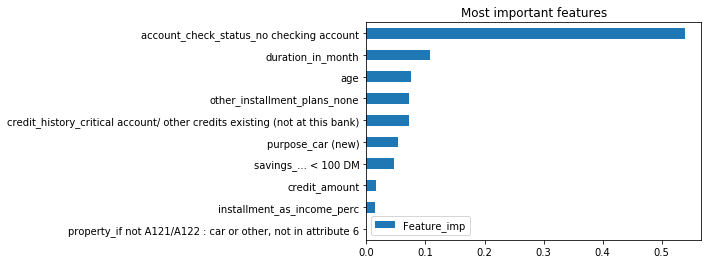

In [54]:
#visualizing feature importances
feat_imp.head(10).sort_values('Feature_imp').plot.barh()
plt.title("Most important features")
plt.show()

In [55]:
#removing columns with 0 importance meaning that the tree was not splitted with those features
to_remove = feat_imp[feat_imp.Feature_imp==0].index
print(to_remove)

Index(['property_if not A121/A122 : car or other, not in attribute 6',
       'present_emp_since_unemployed',
       'personal_status_sex_male : divorced/separated',
       'personal_status_sex_male : married/widowed',
       'personal_status_sex_male : single', 'other_debtors_guarantor',
       'other_debtors_none',
       'telephone_yes, registered under the customers name ',
       'property_real estate', 'job_unskilled - resident',
       'property_unknown / no property',
       'present_emp_since_1 <= ... < 4 years',
       'other_installment_plans_stores', 'housing_own', 'housing_rent',
       'job_skilled employee / official',
       'job_unemployed/ unskilled - non-resident',
       'present_emp_since_4 <= ... < 7 years', 'savings_100 <= ... < 500 DM',
       'present_emp_since_... < 1 year ',
       'savings_unknown/ no savings account', 'present_res_since',
       'credits_this_bank', 'people_under_maintenance',
       'account_check_status_< 0 DM',
       'account_check_stat

In [56]:
#fitting the tree with best hyperparameters after removing 0 importtance columns
dt_grid1=DecisionTreeClassifier(class_weight=best_params['class_weight'],max_depth=best_params['max_depth'],
                             min_samples_leaf=best_params['min_samples_leaf'], random_state=42).fit(X0.drop(to_remove,axis=1),Y0)

Y0_dt_grid1=dt_grid1.predict_proba(X0.drop(to_remove,axis=1))[:,1]
Y1_dt_grid1=dt_grid1.predict_proba(X1.drop(to_remove,axis=1))[:,1]

In [57]:
print("ROC_AUC Train:",roc_auc_score(Y0,Y0_dt_grid1))
print("ROC_AUC Test:",roc_auc_score(Y1,Y1_dt_grid1))

ROC_AUC Train: 0.7737405054782551
ROC_AUC Test: 0.7330680399500624
